# Test the trained model with visualization

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from models.cyclegan.cyclegan_dataloader import CycleGANDataloader
from models.cyclegan.cyclegan_model import CycleGANModel

### 1. Load saved model

In [2]:
def load_model(model, path_to_checkpoint):
    config_path = os.path.join(path_to_checkpoint, 'config.json')
    parameters_path = os.path.join(path_to_checkpoint, 'parameters.torch')
    with open(config_path) as f:
        config = json.load(f)
    config["model"]["device"] = "cuda:1"
    config["model"]["gpu_ids"] = [1]
    model = model(**config["model"])
    checkpoint = torch.load(parameters_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    
    return model

path_to_checkpoint = "/nfs/home/clruben/workspace/nst/models/cyclegan/checkpoints/cyclegan-08-18-2023-07_33_08"
model = load_model(CycleGANModel, path_to_checkpoint)

device = torch.device("cuda:1")
model.to(device)

model.eval()
print("Done.")

Done.


### 2. Load test dataset

In [5]:
source = "/nfs/home/clruben/workspace/nst/data/batch1"

dataloader = CycleGANDataloader(source, "test", mini_batch_sample_size= 1)

### 3. Test the model on some images

In [74]:
batch = dataloader.__next__()

model.set_input(batch)
with torch.no_grad():
    model.forward()
outA = model.fake_a
outB = model.fake_b

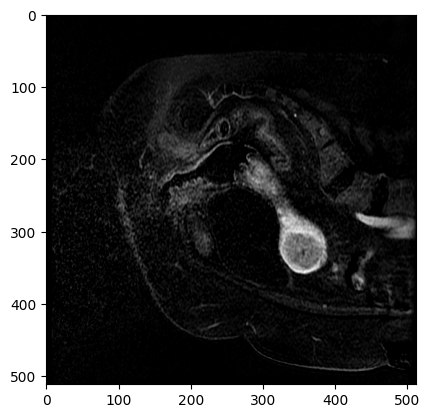

In [75]:
plt.imshow(batch["B"][0][0], cmap="gray")

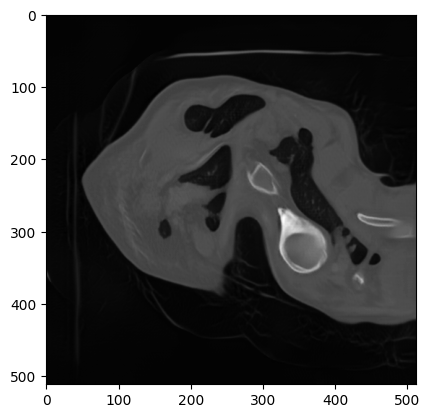

In [76]:
plt.imshow(outA.cpu()[0][0], cmap="gray")

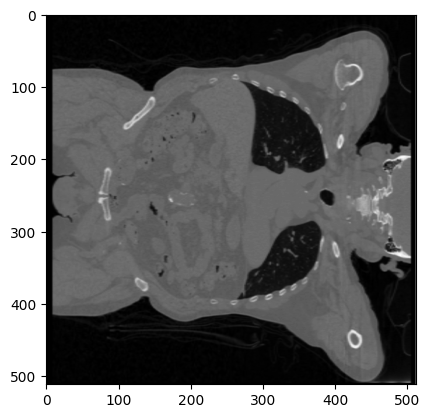

In [69]:
plt.imshow(batch["A"][0][0], cmap="gray")

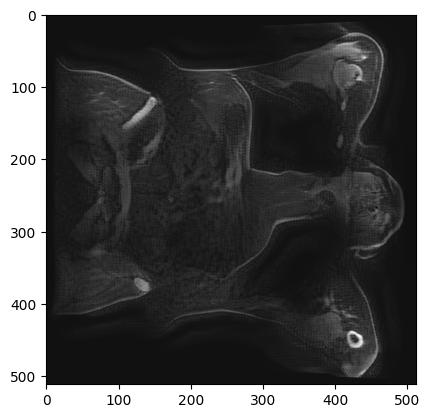

In [70]:
plt.imshow(outB.cpu()[0][0], cmap="gray")

In [55]:
def to_numpy(torch_variable):
    return torch_variable.detach().cpu().numpy()

input_batch_index = 0
input_batch = ct[input_batch_index]
input_type = "CT"

input_batch = torch.tensor(input_batch).to(device)
with torch.no_grad():
    outputs = model(input_batch, input_type)

pred = to_numpy(model.unpatchify(outputs.pred))
mask = to_numpy(outputs.mask)

In [56]:
input_image_index = 5
input_img = mr[input_batch_index][input_image_index][0]
pred_img = pred[0][0]
mask_reshaped = mask[0].reshape(32,32)
def apply_mask(img, mask):
    img_copy = img.copy()
    mask_size = img.shape[0]//mask.shape[0]
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i,j] == 1:
                img_copy[i*mask_size:(i+1)*mask_size, j*mask_size:(j+1)*mask_size] = 0
    return img_copy
masked_img = apply_mask(input_img, mask_reshaped)

(-0.5, 511.5, 511.5, -0.5)

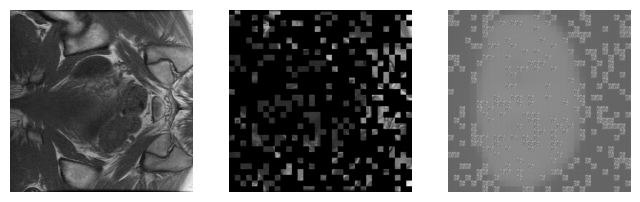

In [57]:
# show input_img, masked_img, and pred_img side by side with subplots
f, axarr = plt.subplots(1,3, figsize=(8, 8))

axarr[0].imshow(input_img, cmap='gray')
axarr[0].axis('off')
axarr[1].imshow(masked_img, cmap='gray')
axarr[1].axis('off')
axarr[2].imshow(pred_img, cmap='gray')
axarr[2].axis('off')


In [60]:
outputs.loss

tensor(0.0036, device='cuda:0')

In [26]:
print(np.min(pred_img), np.max(pred_img))

-1.3073571 1.4261295
